### CUSTOM LOSS FUNCTIONS
#### *1. HUBER LOSS FUNCTION*

+ Suppose you are training a Regression Model.
+ But your data is noisy.
+ So you will clean the data and remove or fix the Outliers.
+ But Still the data is noisy.
+ So which loss function will you use.
+ If we use MSE, it might not penalize the large error.
+ If we use MAE, it woud not penalize outliers.
+ Here we are Implementing the Huber Loss Function.
+ It is available on `keras.losses.huber`
+ But we are trying to Implement that functionally.

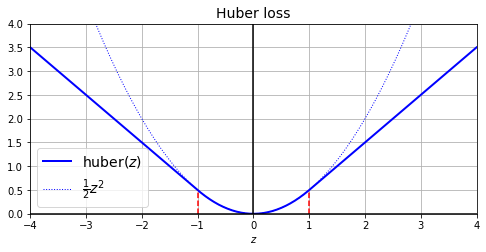

In [36]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## defining the huber function
## this is the loss function
def huber_fn(y_true, y_pred):
    ## define the error from y_true and y_pred, that will be the difference
    error = y_true - y_pred
    #print(error)
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [46]:
## fetch the data.
housing = fetch_california_housing()
# housing.data
# housing.target
print(housing.keys())
print()
print("====================================Complete Dataset======================================")
## X_train_full, X_test, y_train_full, y_test
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target.reshape(-1,1), random_state = 42)
print(X_train_full.shape)
print(X_test.shape)
print(y_train_full.shape)
print(y_test.shape)
print()
print("====================================Dataset After Splitting to Validation Set======================================")
## X_valid, X_test, y_valid, y_test
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print()

print("=================================Standardize the Data==============================================")
## Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled.shape)
X_valid_scaled = scaler.transform(X_valid)
print(y_valid_scaled.shape)
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled.shape)

print("=================================Defining and Develop the Model===================================")
## defining the input shape
input_shape = X_train.shape[1:]
print(input_shape)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "selu", kernel_initializer = "lecun_normal", input_shape = input_shape),
    keras.layers.Dense(1)
])

print("=============================Compile the Model=================================")
model.compile(loss = huber_fn, optimizer = "nadam", metrics = ["mae"])
print(model.summary())

print("=================================Train the Model=======================================")
model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid_scaled, y_valid))

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

====================================Complete Dataset======================================
(15480, 8)
(5160, 8)
(15480, 1)
(5160, 1)

====================================Dataset After Splitting to Validation Set======================================
(11610, 8)
(3870, 8)
(11610, 1)
(3870, 1)

=================================Standardize the Data==============================================
(11610, 8)
(3870, 8)
(5160, 8)
=================================Defining and Develop the Model===================================
(8,)
=============================Compile the Model=================================
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                270       
                                                                 
 dense_10 (Dense)       

In [48]:
## training the model using the mse metrics
print("=============================Compile the Model=================================")
model.compile(loss = huber_fn, optimizer = "nadam", metrics = ["mse"])
print(model.summary())

print("=================================Train the Model=======================================")
model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid_scaled, y_valid))

=============================Compile the Model=================================
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                270       
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None
=================================Train the Model=======================================
Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.0943 - mse: 23.9494 - val_loss: 1.6247 - val_mse: 6.0515
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 2.8963 - mse: 20.5328 - val_loss: 1.6254 - val_mse: 6.0609
Epoch 3/20
36

In [49]:
## save the model
model.save("my_model_with_a_custom_loss.h5")

#### *2. SAVING AND LOADNG THE MODELS THAT CONTAIN CUSTOM COMPONENTS*

+ When you load a model containing custom objects you need to map the name to the objects.
+ 

In [51]:
## when you load the model, need to specify the name of the object.
model = keras.models.load_model("my_model_with_a_custom_loss.h5", custom_objects = {"huber_fn":huber_fn})
## train the model.
model.fit(X_train_scaled, y_train, epochs=20,validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3862 - mse: 1.1175 - val_loss: 0.2800 - val_mse: 6.5311
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2275 - mse: 0.5973 - val_loss: 0.2512 - val_mse: 4.5090
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2150 - mse: 0.5376 - val_loss: 0.2359 - val_mse: 3.2253
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2097 - mse: 0.5149 - val_loss: 0.2223 - val_mse: 2.1146
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2058 - mse: 0.4925 - val_loss: 0.2108 - val_mse: 1.2770
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2030 - mse: 0.4809 - val_loss: 0.1959 - val_mse: 0.6308
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2003 - mse: 0.4667 - val_loss: 0.1837 - val_mse: 0.4208
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

+ any error between -1 and 1 considered as small.
+ But if you want different threshold, we will have to build new function for it.

In [54]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

## training the model using the mse metrics
print("=============================Compile the Model=================================")
model.compile(loss = create_huber(2.0), optimizer = "nadam", metrics = ["mae"])
print(model.summary())

print("=================================Train the Model=======================================")
model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid_scaled, y_valid))

=============================Compile the Model=================================
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                270       
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None
=================================Train the Model=======================================
Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 6.5918 - mae: 4.2092 - val_loss: 0.2580 - val_mae: 0.5239
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 5.3298 - mae: 3.5683 - val_loss: 0.2688 - val_mae: 0.5278
Epoch 3/20
363/

In [55]:
## saving the latest model
model.save("my_model_with_a_custom_loss_threshold_2.h5")

+ when the model is saved, the threshold will not get saved.
+ So when you load the model, we have to specify the threshold value.

In [57]:
model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})
print("=================================Train the Model=======================================")
model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid_scaled, y_valid))

=================================Train the Model=======================================
Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8387 - mae: 1.6689 - val_loss: 0.4120 - val_mae: 0.6215
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6924 - mae: 1.5631 - val_loss: 0.4151 - val_mae: 0.6245
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6804 - mae: 1.5697 - val_loss: 0.4152 - val_mae: 0.6233
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5833 - mae: 1.4992 - val_loss: 0.4195 - val_mae: 0.6259
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5996 - mae: 1.5261 - val_loss: 0.4246 - val_mae: 0.6311
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 1.4970 - mae: 1.4609 - val_loss: 0.4280 - val_mae: 0.6326
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5177 - mae: 1.4651 - val_loss: 0.4340 - val_

#### DOING THE SAME USING A CLASS OBJECT.

In [65]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}
    
print("==============DEVELOP THE MODEL==================")
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

print("=============COMPILE THE MODEL===================")
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

print("==============TRAIN THE MODEL====================")
model.fit(X_train_scaled, y_train, epochs=20,validation_data=(X_valid_scaled, y_valid))

print("==============SAVE THE MODEL======================")
model.save("my_model_with_a_custom_loss_class.h5")

==============DEVELOP THE MODEL==================
=============COMPILE THE MODEL===================
==============TRAIN THE MODEL====================
Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 0.8213 - mae: 0.9919 - val_loss: 0.2731 - val_mae: 0.5192
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2324 - mae: 0.5046 - val_loss: 0.2461 - val_mae: 0.5001
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2254 - mae: 0.4964 - val_loss: 0.2251 - val_mae: 0.4883
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2217 - mae: 0.4920 - val_loss: 0.2124 - val_mae: 0.4765
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2182 - mae: 0.4884 - val_loss: 0.2028 - val_mae: 0.4714
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2155 - mae: 0.4851 - val_loss: 0.2263 - val_mae: 0.4809
Epoch 7/20
363/363 [==============================] - 1s 2

In [66]:
## loading the model
model = keras.models.load_model("my_model_with_a_custom_loss_class.h5",
                                custom_objects={"HuberLoss": HuberLoss})

## train the model again.
model.fit(X_train_scaled, y_train, epochs=20,validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.1914 - mae: 0.4491 - val_loss: 0.2410 - val_mae: 0.4732
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.1913 - mae: 0.4478 - val_loss: 0.2148 - val_mae: 0.4615
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.1903 - mae: 0.4481 - val_loss: 0.2413 - val_mae: 0.4701
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.1903 - mae: 0.4462 - val_loss: 0.1898 - val_mae: 0.4384
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.1879 - mae: 0.4439 - val_loss: 0.1997 - val_mae: 0.4456
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.1880 - mae: 0.4437 - val_loss: 0.2135 - val_mae: 0.4538
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.1874 - mae: 0.4428 - val_loss: 0.1828 - val_mae: 0.4407
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [67]:
model.loss.threshold

2.0

+ When the model is saved, the threshold will be saved along with it.
+ When the model is load, you just need to map the class name to the class itself.

***